In [ ]:
## Notebook env: mirtud_env (R kernel)
## This notebook creates a cell profile hierachial clusetering heatmap (Fig.2A Replogle et al)
## It also classifies cells from each pertubations into different pathways (Fig.4A and 4B Replogle et al)
## Annotate the controls as one control 'TuD_NC' so they are all one (sample cells if needed to lower cell #)

library(Matrix)
library(Seurat)
library(stringr)
library(ggplot2)
library(dbscan)
library(ggpubr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:
### Data loading ###
tRF_loaded_seuratobj <- readRDS('/home/ssobti/projects/mir_tud/010523_filtered_data/tRF_normalized_integrated_seurat.rds')

In [3]:
tRF_seuratobj = CreateSeuratObject(tRF_loaded_seuratobj@assays$RNA@counts, meta.data = tRF_loaded_seuratobj@meta.data)
tRF_seuratobj = SCTransform(tRF_seuratobj, vars.to.regress = c('sample', 'percent.mt', 'nCount_RNA'))

## metadata
meta = tRF_seuratobj@meta.data
meta$guide[str_sub(meta$guide, 1, 3) == 'TuD'] <- 'TuD_NC'
tRF_seuratobj@meta.data <- meta
head(tRF_seuratobj@meta.data)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 25464 by 23540

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 79 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 25464 genes



  |======================================================================| 100%


Computing corrected count matrix for 25464 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 5.891091 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out sample, percent.mt, nCount_RNA

Centering data matrix

Set default assay to SCT



,orig.ident,nCount_RNA,nFeature_RNA,sample,barcode,guide,lor,pvalue,adj_pvalue,max_umi,⋯,v_umi,log_max_umi,log_n_umi,log_m_umi,percent.mt,integrated_snn_res.0.5,seurat_clusters,guide_group,nCount_SCT,nFeature_SCT
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<dbl>,<int>
tRF_1:AAACCCAAGGCCTTGC-1,tRF,20239,5372,tRF_1,AAACCCAAGGCCTTGC,TuD_NC,2.144148,1.652448e-15,8.377661e-09,23,⋯,2.458841,1.361728,1.518514,-0.82193017,6.363951,3,control,control,28241,5408
tRF_1:AAACCCACATATACCG-1,tRF,35201,7086,tRF_1,AAACCCACATATACCG,tRF_Arg_ACG_2,7.473168,2.865581e-322,1.452806e-315,182,⋯,151.260944,2.260071,2.330414,-0.01003034,6.295276,4,T4,target,30541,7086
tRF_1:AAACCCACATGACAGG-1,tRF,32207,6695,tRF_1,AAACCCACATGACAGG,TuD_NC,2.336330,3.615579e-22,1.833044e-15,36,⋯,5.973273,1.556303,1.724276,-0.61616825,6.237774,1,control,control,30333,6695
tRF_1:AAACCCACATGACGGA-1,tRF,38017,7151,tRF_1,AAACCCACATGACGGA,tRF_Arg_ACG_2,1.160519,2.865581e-322,1.452806e-315,214,⋯,237.780319,2.330414,2.570543,0.23009883,6.831154,4,T4,target,30496,7141
tRF_1:AAACCCAGTCAACCAT-1,tRF,28633,6505,tRF_1,AAACCCAGTCAACCAT,TuD_NC,3.011825,9.624496e-26,4.879475e-19,38,⋯,6.638180,1.579784,1.707570,-0.63287394,8.619425,3,control,control,28918,6505
tRF_1:AAACCCAGTTATCTTC-1,tRF,28000,6688,tRF_1,AAACCCAGTTATCTTC,tRF_Glu_CTC_2,4.656560,7.086097e-135,3.592545e-128,69,⋯,21.984584,1.838849,1.944483,-0.39596144,6.617857,2,T2,target,28633,6688


In [4]:
saveRDS(tRF_seuratobj, '/home/ssobti/projects/mir_tud/output_data/genexp_pathway/tRF_sctransformed_seurat.rds')

In [2]:
tRF_seuratobj = readRDS('/home/ssobti/projects/mir_tud/output_data/genexp_pathway/tRF_sctransformed_seurat.rds')

Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


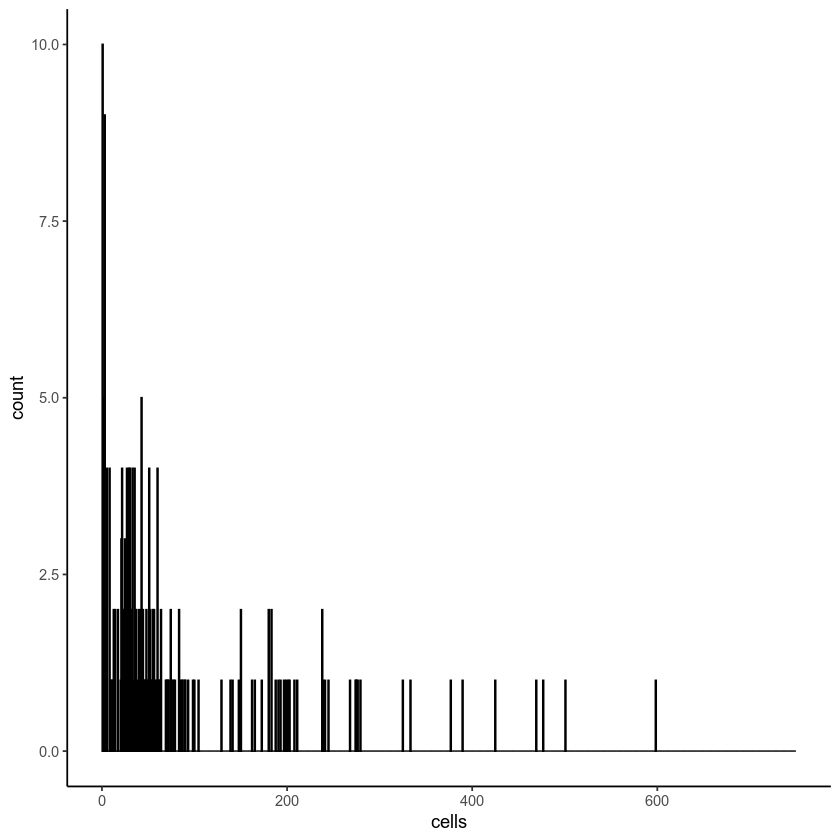

In [6]:
count_df = data.frame(guide = names(table(meta$guide)), cells = as.numeric(table(meta$guide)))
ggplot(count_df, aes(x = cells)) + geom_histogram(color="black", fill="white", position = "identity", bins = 1000) + 
xlim(0,750) + theme_classic()

In [7]:
### For Fig2A, first take normalized gene expression averages
## to build pseudo-bulk expression profile for each perturbation
Pseudo_bulk_exp <- AverageExpression(tRF_seuratobj, assays = "SCT", group.by = "guide", slot = "scale.data")
Pseudo_bulk_exp <- Pseudo_bulk_exp[['SCT']]

In [8]:
range(Pseudo_bulk_exp)

[1] -6.374595 28.019926

In [9]:
dim(Pseudo_bulk_exp)

[1] 3000  196

In [10]:
## run spearman correlation on Pseudo_bulk_exp matrix
perturb_perturb_corr_mtx <- cor(Pseudo_bulk_exp, method = 'spearman')

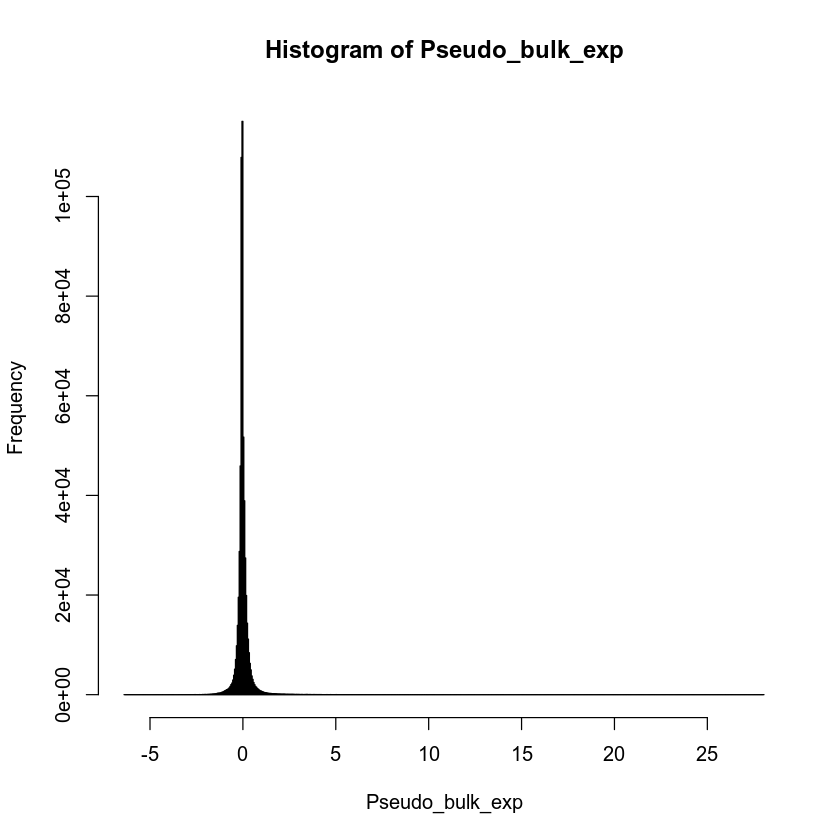

In [11]:
options(repr.plot.width = 7, repr.plot.height = 7)
hist(Pseudo_bulk_exp, breaks = 1000)

Loading required package: grid



ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



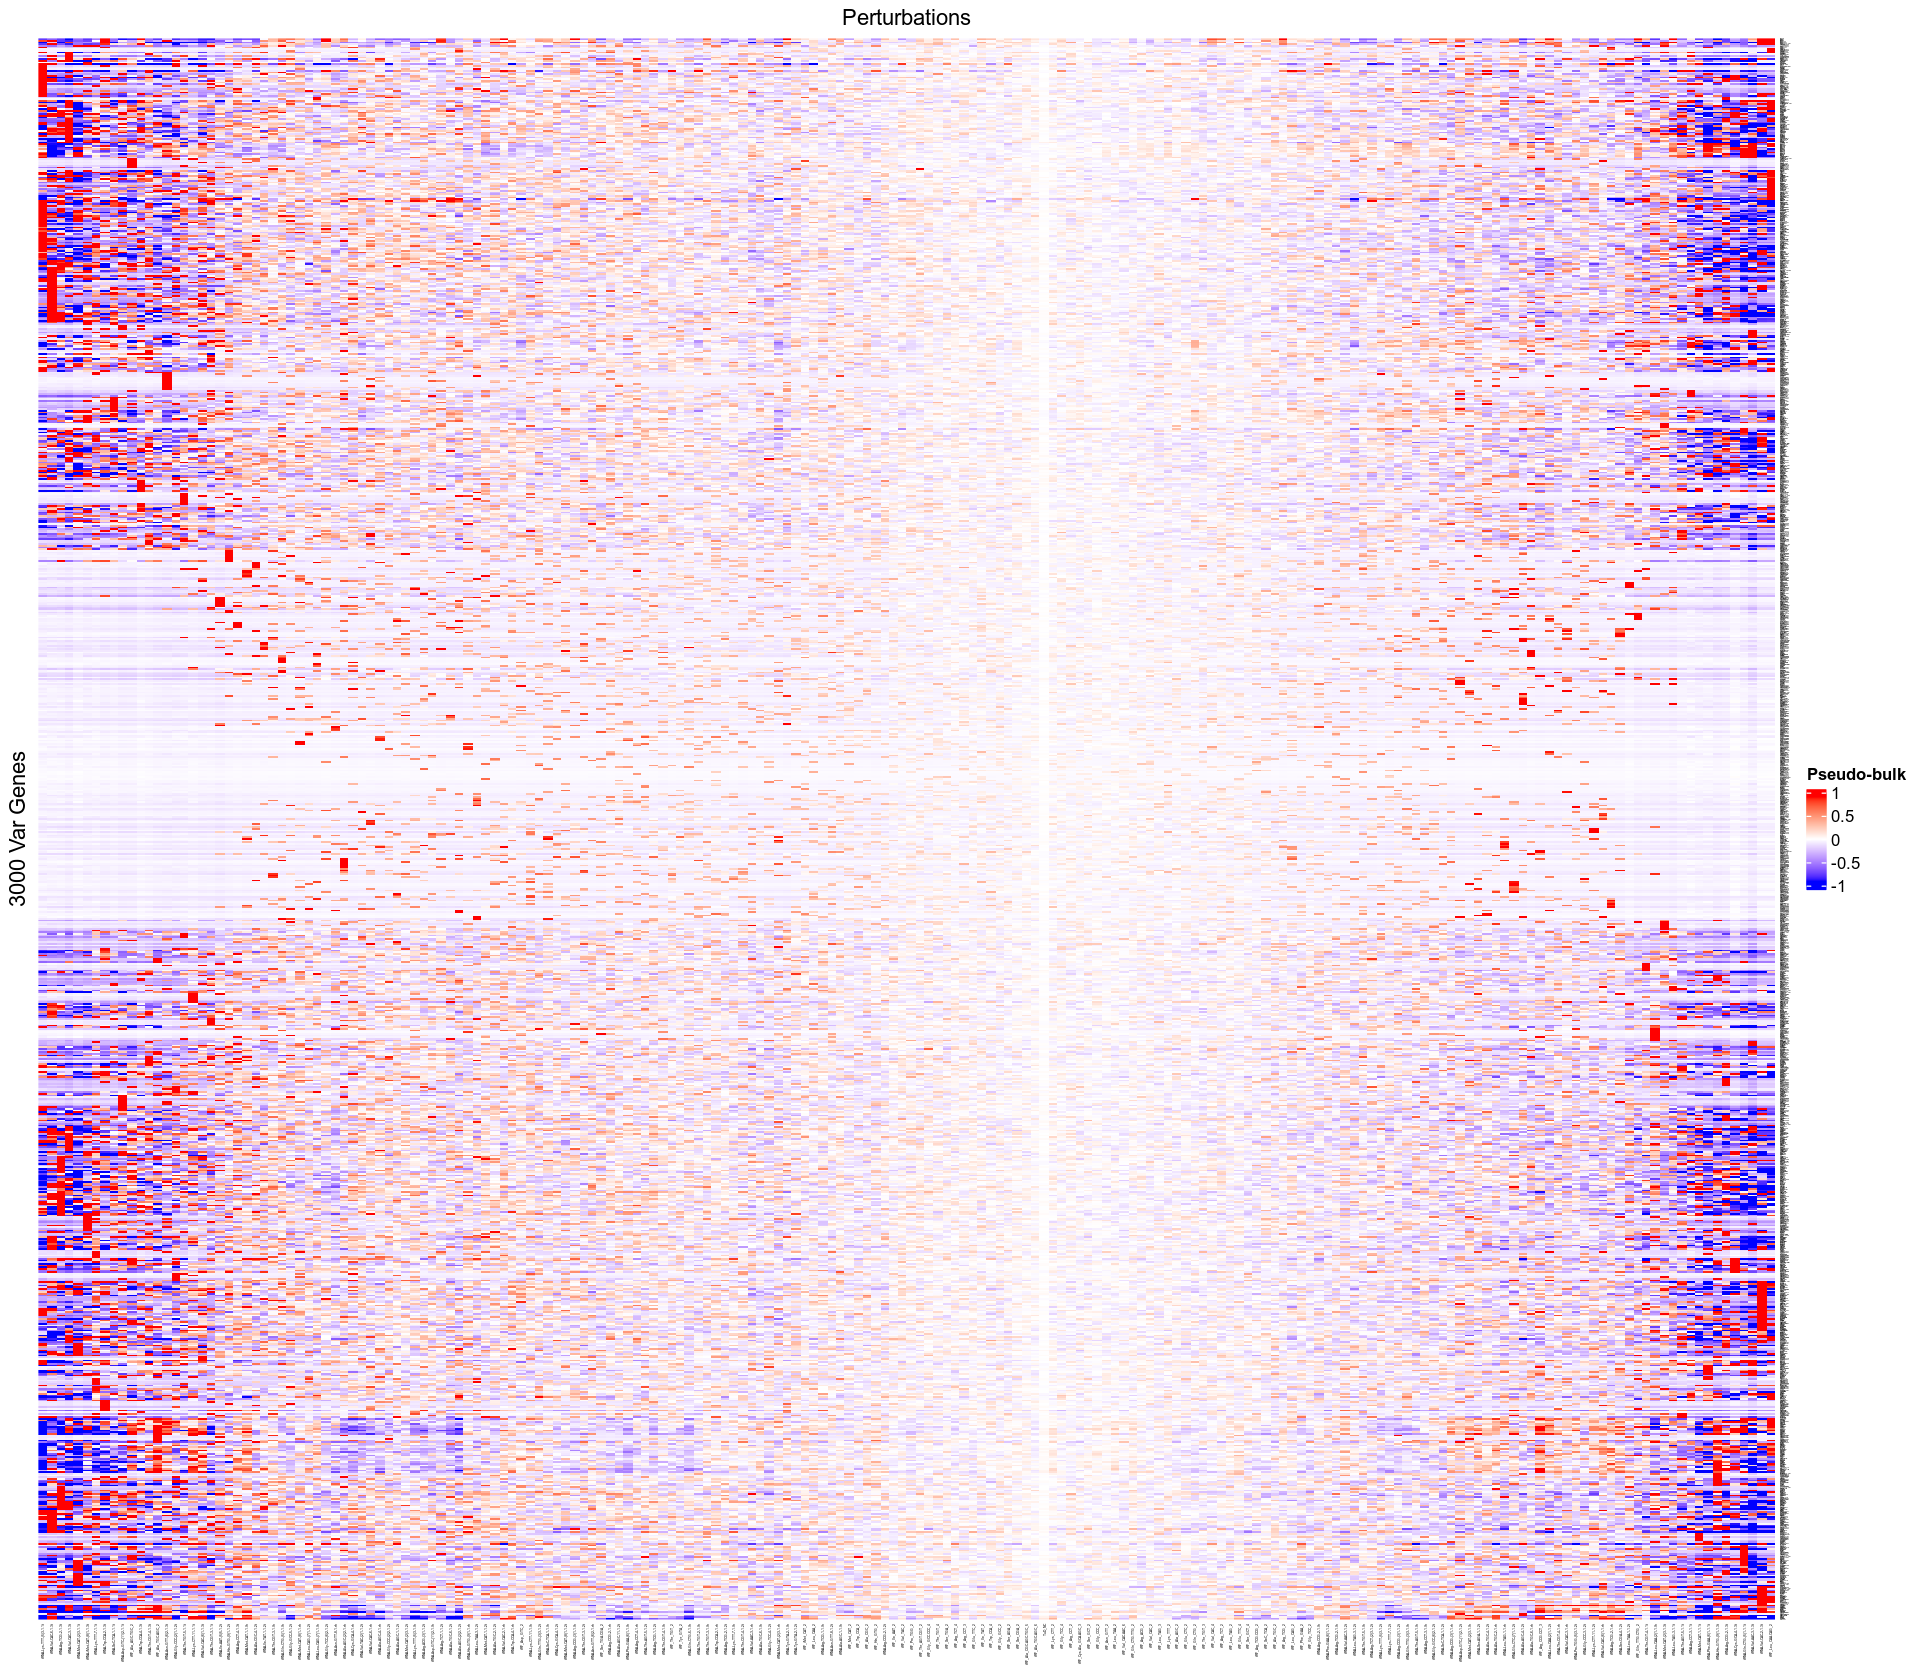

In [13]:
#### Gene Expression by Perturbation Heatmap (Replogle Fig.2A pt.1) ####
library(ComplexHeatmap)
library(gridExtra)

avg = mean(Pseudo_bulk_exp)
lower_bound = mean(Pseudo_bulk_exp) - 2*sd(Pseudo_bulk_exp)
upper_bound = mean(Pseudo_bulk_exp) + 2*sd(Pseudo_bulk_exp)
coloring_map <- circlize::colorRamp2(c(lower_bound, avg, upper_bound), c("blue", "white", "red"))

perturb_htmp <- function(matrix, title) {
  draw(Heatmap(matrix, name = title, show_column_names = TRUE, show_row_names = TRUE, show_column_dend = FALSE,
               col = coloring_map, show_row_dend = FALSE, use_raster = TRUE, row_title = '3000 Var Genes', 
               column_title = 'Perturbations', row_title_side = 'left', column_title_side = 'top', 
               column_names_gp = gpar(fontsize = 2), row_names_gp = gpar(fontsize = 1)))
}


options(repr.plot.width = 16, repr.plot.height = 14)
pdf('/home/ssobti/projects/mir_tud/output_data/genexp_pathway/avg_genexp_htmap_tRF.pdf', width = 12, height = 11)
perturb_htmp(Pseudo_bulk_exp, 'Pseudo-bulk')
dev.off()

perturb_htmp(Pseudo_bulk_exp, 'Pseudo-bulk')

In [ ]:
saveRDS(Pseudo_bulk_exp, '/home/ssobti/projects/mir_tud/fig_output/data/fig2/tRF_pseudo_bulk_exp.rds')

In [14]:
perturb_perturb_corr_mtx[1:3,1:3]

,tRF_Ala_AGC_2,tRF_Ala_AGC.TGC_2,tRF_Ala_CGC_2
tRF_Ala_AGC_2,1.00000000,0.03237806,-0.09650084
tRF_Ala_AGC.TGC_2,0.03237806,1.00000000,-0.00638645
tRF_Ala_CGC_2,-0.09650084,-0.00638645,1.00000000


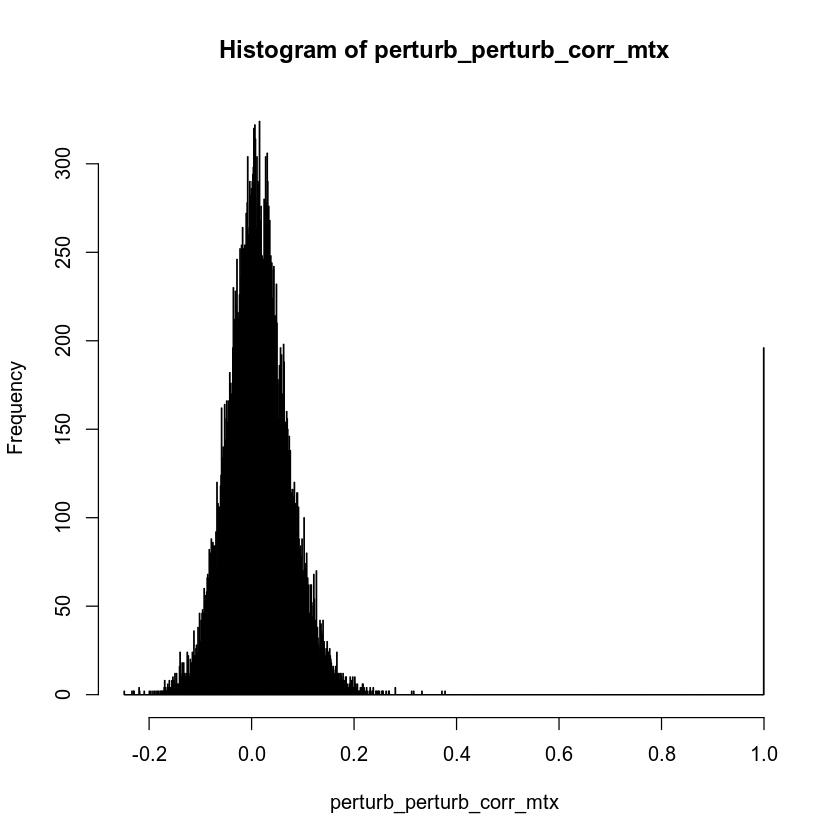

In [15]:
options(repr.plot.width = 7, repr.plot.height = 7)
hist(perturb_perturb_corr_mtx, breaks = 1000)

In [16]:
mean(perturb_perturb_corr_mtx) + 2*sd(perturb_perturb_corr_mtx)

[1] 0.201867

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



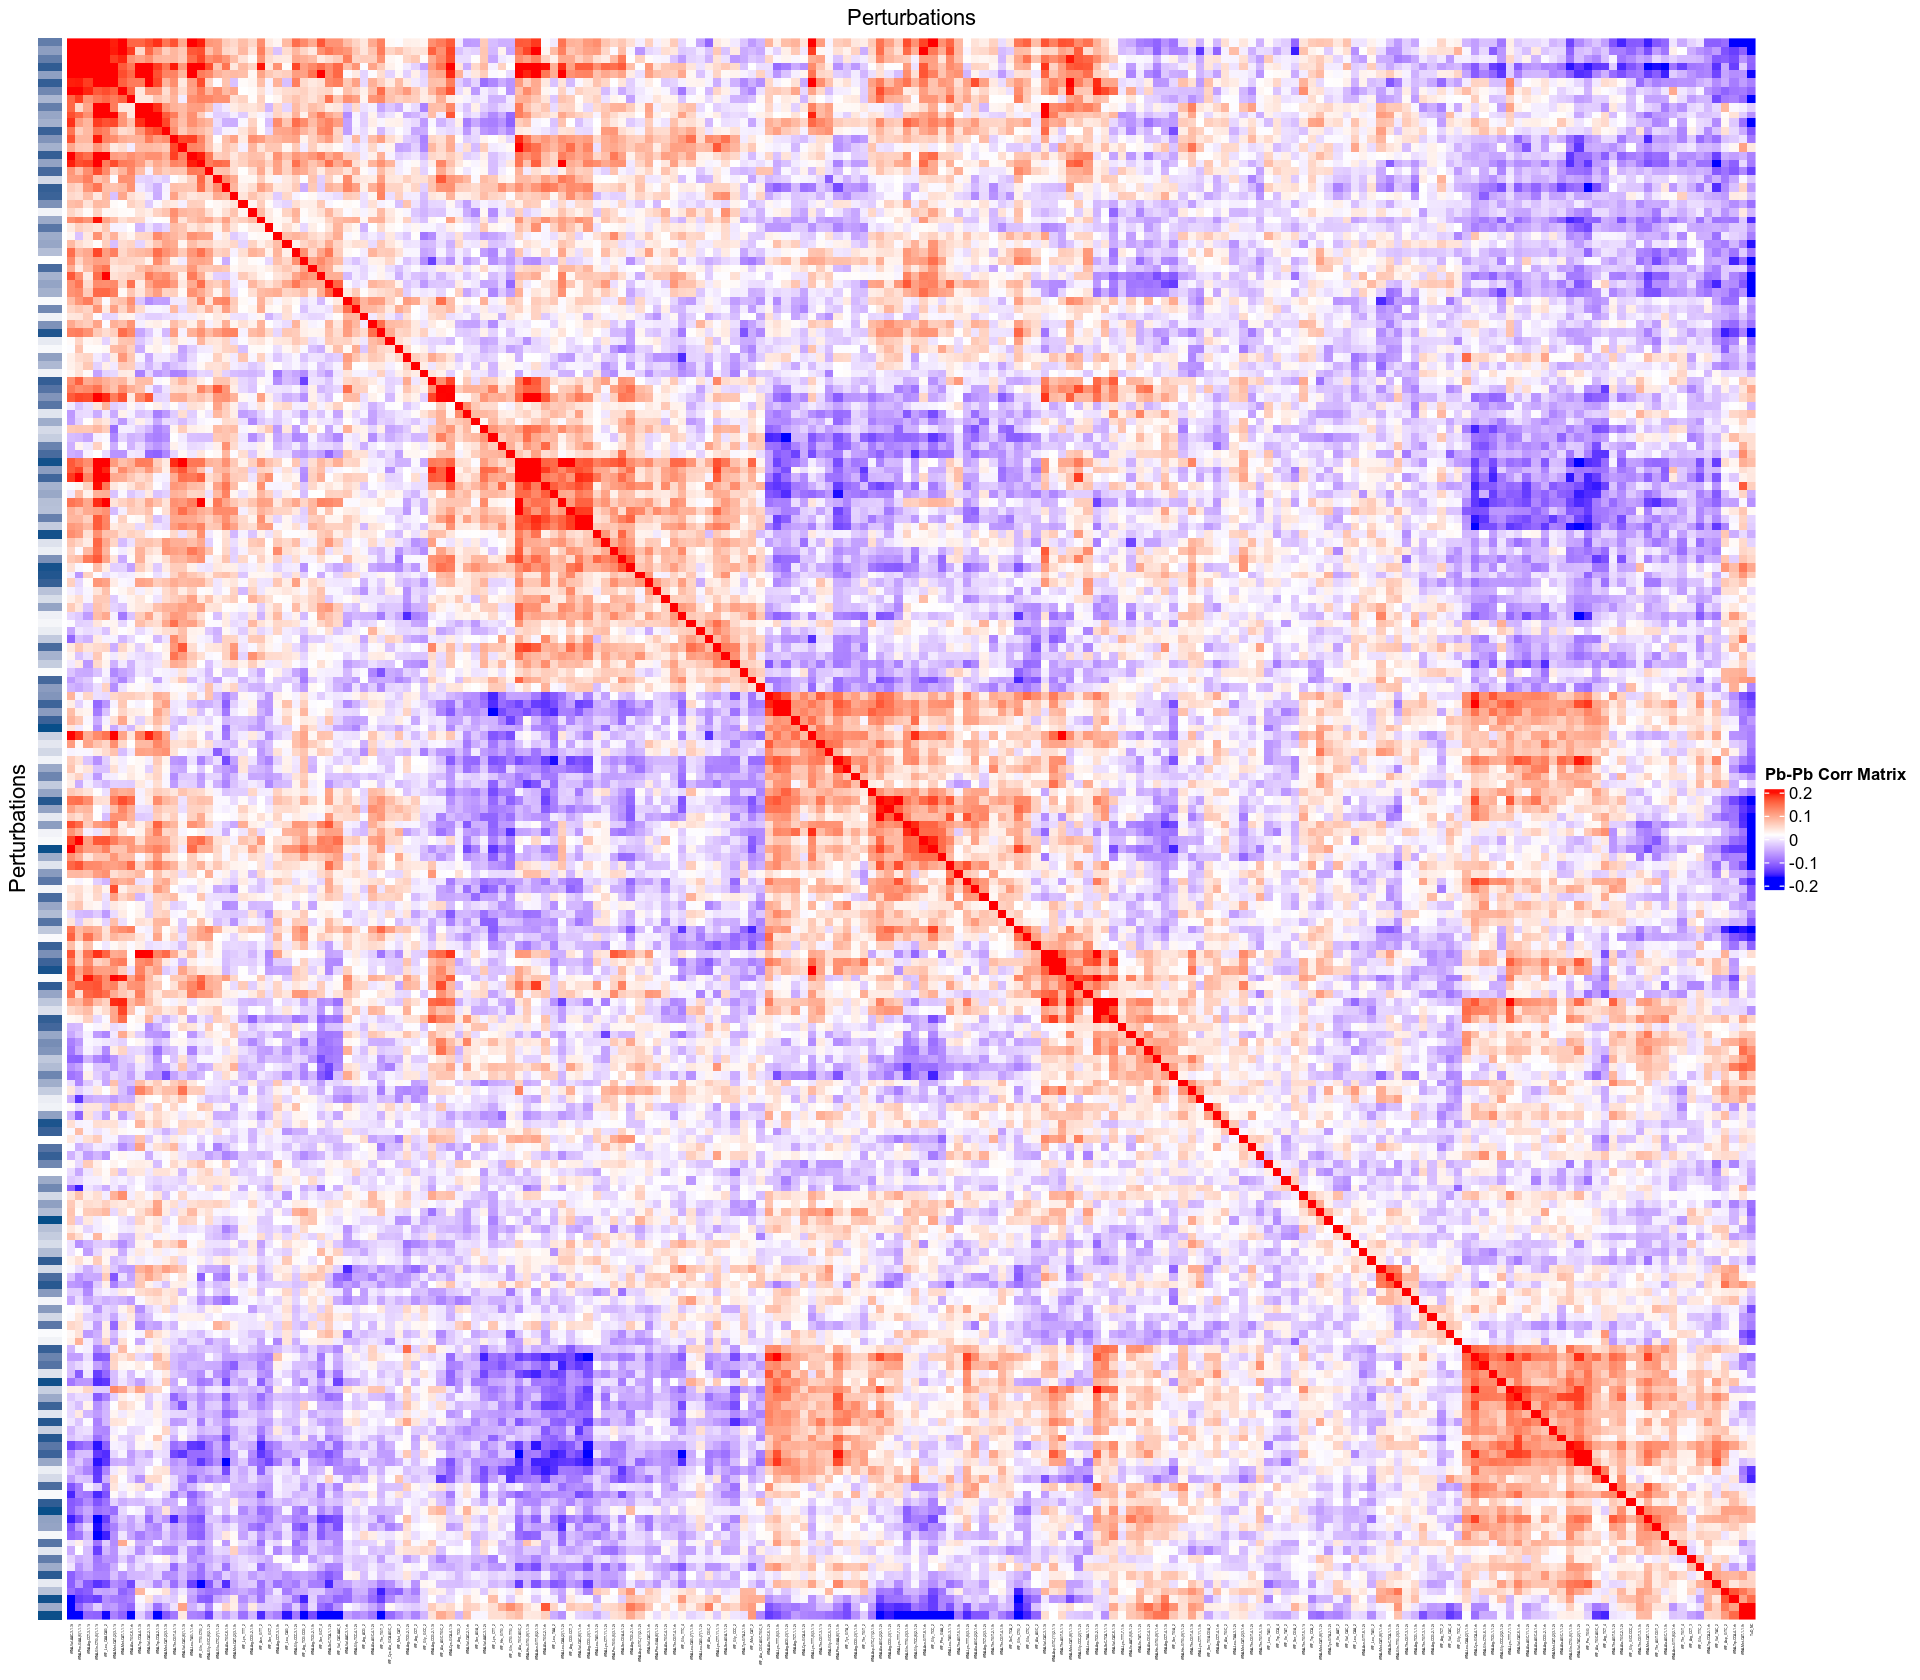

In [16]:
#### Perturbation - Perturbation Spearman Correlation Matrix (Replogle Fig.2A pt.2) ####
set.seed(20)
avg = mean(perturb_perturb_corr_mtx)
lower_bound = mean(perturb_perturb_corr_mtx) - 2*sd(perturb_perturb_corr_mtx)
upper_bound = mean(perturb_perturb_corr_mtx) + 2*sd(perturb_perturb_corr_mtx)
coloring_map <- circlize::colorRamp2(c(lower_bound, avg, upper_bound), c("blue", "white", "red"))

annot = rowAnnotation(perturb = runif(nrow(perturb_perturb_corr_mtx)), show_legend = FALSE, show_annotation_name = FALSE)

perturb_perturb_corr_mtx_htmp <- function(matrix, title, annotation) {
  draw(Heatmap(matrix, name = title, show_column_names = TRUE, show_row_names = FALSE, show_column_dend = FALSE,
               col = coloring_map, show_row_dend = FALSE, use_raster = TRUE, row_title = 'Perturbations', 
               column_title = 'Perturbations', row_title_side = 'left', column_title_side = 'top', 
               column_names_gp = gpar(fontsize = 2), row_names_gp = gpar(fontsize = 1),
               left_annotation = annotation))
}



options(repr.plot.width = 16, repr.plot.height = 14)
pdf('/home/ssobti/projects/mir_tud/output_data/genexp_pathway/avg_genexp_corr_htmap_tRF.pdf', width = 12, height = 11)
perturb_perturb_corr_mtx_htmp(perturb_perturb_corr_mtx, 'Pb-Pb Corr Matrix', annot)
dev.off()

perturb_perturb_corr_mtx_htmp(perturb_perturb_corr_mtx, 'Pb-Pb Corr Matrix', annot)

In [ ]:
saveRDS(perturb_perturb_corr_mtx, '/home/ssobti/projects/mir_tud/fig_output/data/fig2/tRF_perturb_perturb_corr_mtx.rds')

### Correlation within tRF clusters vs correlation between equivalent clusters made of random unique guides ###

In [ ]:
suppressWarnings(suppressMessages(library(Seurat)))
suppressWarnings(suppressMessages(library(tidyverse)))
adata.tRF = readRDS('/home/ssobti/projects/mir_tud/output_data/genexp_pathway/tRF_sctransformed_seurat.rds')
older_obj_with_indiviudal_trfs = read.csv('/home/ssobti/projects/mir_tud/101322_filtered_data/tRF.concat.raw.adata_gex.guide_assigned.obs.csv', row.names = 1)
indexes = match(rownames(older_obj_with_indiviudal_trfs), rownames(adata.tRF@meta.data))
indexes = indexes[!is.na(indexes)]
adata.tRF = adata.tRF[,indexes]
adata.tRF@meta.data$nonclustered_guide = older_obj_with_indiviudal_trfs[rownames(adata.tRF@meta.data),'guide']
adata.tRF@meta.data$nonclustered_guide[startsWith(adata.tRF@meta.data$nonclustered_guide,'TuD_NC')] = 'TuD_NC'
meta = adata.tRF@meta.data

Pseudo_bulk_exp <- AverageExpression(adata.tRF, assays = "SCT", group.by = "nonclustered_guide", slot = "scale.data")
Pseudo_bulk_exp <- Pseudo_bulk_exp[['SCT']]
perturb_perturb_corr_mtx <- cor(as.matrix(Pseudo_bulk_exp), method = 'spearman')

guide_to_cluster_key = meta[,c('nonclustered_guide', 'guide')] %>% distinct()
guide_to_cluster_key = guide_to_cluster_key[!startsWith(guide_to_cluster_key$nonclustered_guide, 'TuD_NC'),]
guide_to_cluster_key$cluster_status = ifelse(stringr::str_count(guide_to_cluster_key$guide, "_") > 2, 'Cluster', 'Unique')

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [48]:
## get tRF clusters and their intracluster correlations values (minus miR self-correlations)
clusters = guide_to_cluster_key %>% filter(cluster_status == 'Cluster') %>% pull(guide) %>% unique()
clusters_tRF_dictionary_list = lapply(clusters, function(x) {guide_to_cluster_key$nonclustered_guide[guide_to_cluster_key$guide == x]})
names(clusters_tRF_dictionary_list) = clusters
clusters_tRF_dictionary_list = clusters_tRF_dictionary_list[lapply(clusters_tRF_dictionary_list, function(x) {length(x)}) > 1]  ## 19 families present

cluster_subset_corr_mtxs = lapply(clusters_tRF_dictionary_list, function(x) {perturb_perturb_corr_mtx[x,x]})
intracluster_r_values_w_removed_self_correlations = lapply(lapply(cluster_subset_corr_mtxs, as.numeric), function(x) x[!(x == 1)])

In [261]:
## make families from random unique miR guides to compare with miR families
## get their intrafamily correlations values (minus self-correlations)
clusters_tRF_constituent_count = lapply(clusters_tRF_dictionary_list, length)

set.seed(1450)
random_unique_guides = guide_to_cluster_key %>% filter(!(nonclustered_guide %in% unlist(clusters_tRF_dictionary_list))) %>% pull(nonclustered_guide) %>% sample(x = ., size = sum(as.numeric(clusters_tRF_constituent_count)), replace = T)
splitting_order = mapply(FUN = rep, 1:length(names(clusters_tRF_constituent_count)), as.numeric(clusters_tRF_constituent_count)) %>% unlist() %>% as.character()
random_unique_guides_list = split(random_unique_guides, splitting_order)
random_unique_guides_list = random_unique_guides_list[order(as.numeric(names(random_unique_guides_list)))]

random_unique_guides_subset_corr_mtxs = lapply(random_unique_guides_list, function(x) {perturb_perturb_corr_mtx[x,x]})
intrarandom_unique_guides_r_values_w_removed_self_correlations = lapply(lapply(random_unique_guides_subset_corr_mtxs, as.numeric), function(x) x[!(x == 1)])

In [262]:
## get median correlation for each cluster and random unique cluster
median_intracluster_r_values_w_removed_self_correlations = lapply(intracluster_r_values_w_removed_self_correlations, median)
median_intrarandom_unique_guides_r_values_w_removed_self_correlations = lapply(intrarandom_unique_guides_r_values_w_removed_self_correlations, median)

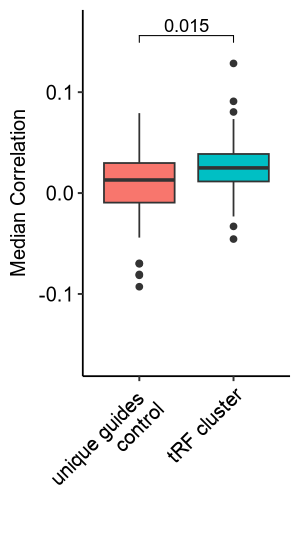

In [ ]:
## plot
df = rbind(data.frame(cluster = names(median_intracluster_r_values_w_removed_self_correlations), median_correlation = unlist(median_intracluster_r_values_w_removed_self_correlations), cluster_status = 'tRF_cluster') , 
           data.frame(cluster = names(median_intracluster_r_values_w_removed_self_correlations), median_correlation = unlist(median_intrarandom_unique_guides_r_values_w_removed_self_correlations), cluster_status = 'random_unique_guides'))
rownames(df) = NULL
df$cluster_status[df$cluster_status == 'random_unique_guides'] = 'unique guides \n control'
df$cluster_status[df$cluster_status == 'tRF_cluster'] = 'tRF cluster'
df$cluster_status = factor(df$cluster_status, levels = c('unique guides \n control', 'tRF cluster'))
# saveRDS(df, '/home/ssobti/projects/mir_tud/fig_output/data/fig2/tRF_cluster_vs_random_unique_guides_correlation_values.rds')

options(repr.plot.width = 2.5, repr.plot.height = 4.5)
comparison = list(c('unique guides \n control', 'tRF cluster'))
df %>% ggplot(aes(x = cluster_status, y = median_correlation, fill = cluster_status)) + xlab('') + geom_boxplot(show.legend = FALSE) + 
ggpubr::theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) +
scale_fill_discrete() + ylab('Median Correlation') + ggpubr::stat_compare_means(comparisons = comparison,label.y = 0.145) + ylim(c(-0.165, 0.165)) #+ ggtitle('Intracluster vs Intrarandom Unique tRF Guides Correlation Values') + theme(legend.position = 'none')

### Correlations between TuD_NCs vs between tRF perturbations ###

In [1]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [ ]:
tRF_loaded_seuratobj <- readRDS('/home/ssobti/projects/mir_tud/010523_filtered_data/tRF_normalized_integrated_seurat.rds')
orig_meta = tRF_loaded_seuratobj@meta.data

tRF_seuratobj = readRDS('/home/ssobti/projects/mir_tud/output_data/genexp_pathway/tRF_sctransformed_seurat.rds')
meta = tRF_seuratobj@meta.data
meta$original_guide = orig_meta$guide
tRF_seuratobj@meta.data = meta

In [21]:
Pseudo_bulk_exp <- AverageExpression(tRF_seuratobj, assays = "SCT", group.by = "original_guide", slot = "scale.data")
Pseudo_bulk_exp <- Pseudo_bulk_exp[['SCT']]
perturb_perturb_corr_mtx <- cor(as.matrix(Pseudo_bulk_exp), method = 'pearson')

In [22]:
control_mtx = perturb_perturb_corr_mtx[startsWith(rownames(perturb_perturb_corr_mtx), 'TuD-NC'), startsWith(colnames(perturb_perturb_corr_mtx), 'TuD-NC')]
tRF_mtx = perturb_perturb_corr_mtx[!startsWith(rownames(perturb_perturb_corr_mtx), 'TuD-NC'), !startsWith(colnames(perturb_perturb_corr_mtx), 'TuD-NC')]

control_corrs = control_mtx[upper.tri(control_mtx, diag = FALSE)]
tRF_corrs = tRF_mtx[upper.tri(tRF_mtx, diag = FALSE)]

df = data.frame(guide = c(rep('control', length(control_corrs)), rep('tRF', length(tRF_corrs))), correlation = c(control_corrs, tRF_corrs))
df$correlation = abs(df$correlation)

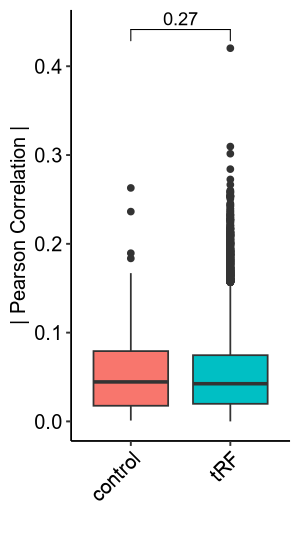

In [23]:
options(repr.plot.width = 2.5, repr.plot.height = 4.5)
comparison = list(c('control', 'tRF'))
ggplot(df, aes(x = guide, y = correlation, fill = guide)) + xlab('') + geom_boxplot(show.legend = FALSE) + 
ggpubr::theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) +
scale_fill_discrete() + ylab('| Pearson Correlation |') + ggpubr::stat_compare_means(method = 't.test', comparisons = comparison, method.args = list(alternative = "greater")) #+ ylim(c(-0.15, 0.15))